## Here there is imported the data

All the data must be loaded from a excel file that is in the same folder. This file is numeric only and contains in the last column the dependent variable. The column name of the last column should be Outcome

In [1]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_excel("Benavides.xlsx")
pima.head()

,Angulo,Altura,Velocidad,Resultado
0,56.9,1.875,6.871,0
1,56.8,1.803,6.467,1
2,55.7,1.750,5.930,1
3,56.7,1.862,6.360,0
4,58.9,1.809,6.329,1


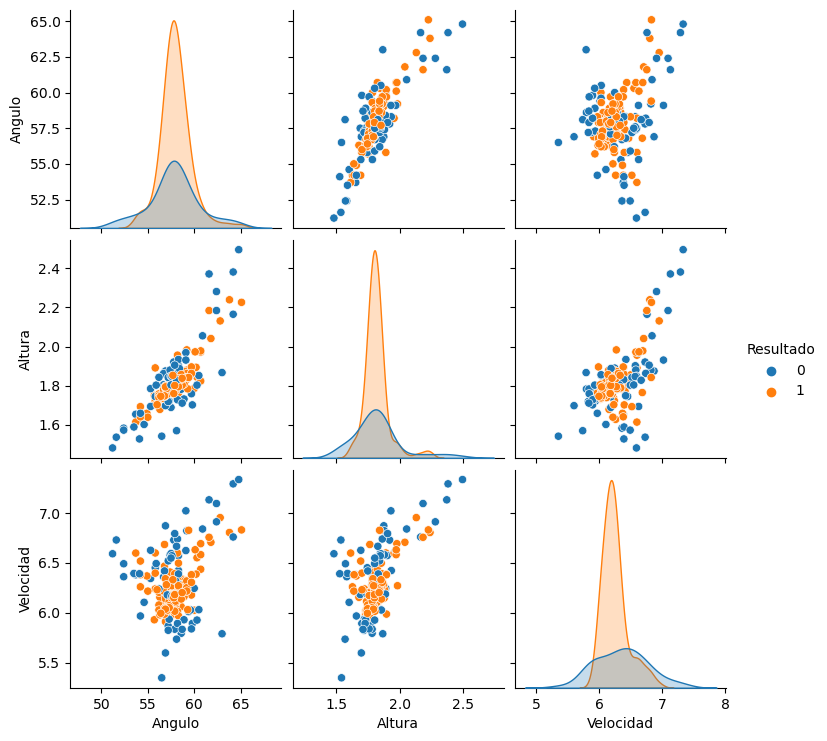

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pima, hue="Resultado")
plt.savefig("Pairplot.jpg")

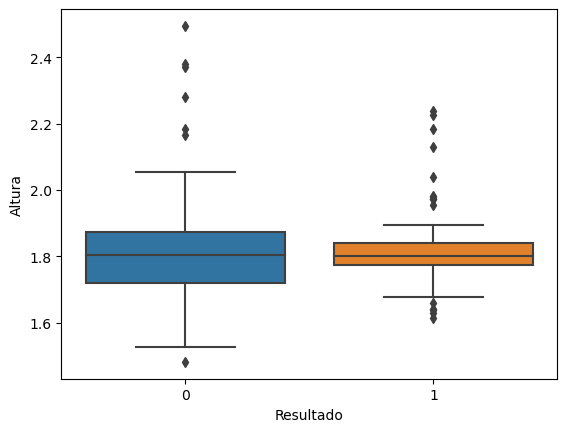

In [3]:
sns.boxplot(pima[["Altura","Resultado"]], x="Resultado", y="Altura")
plt.savefig("Altura.jpg")

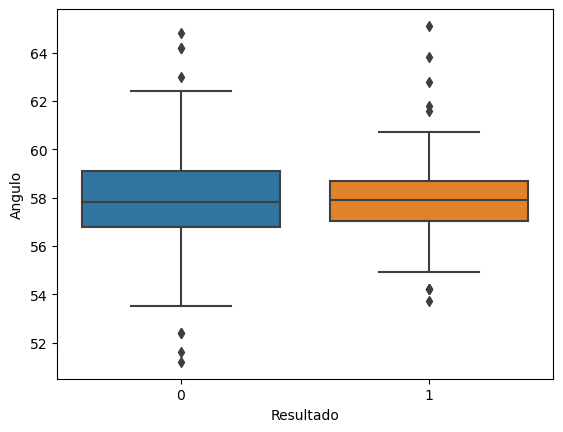

In [4]:
sns.boxplot(pima[["Angulo","Resultado"]], x="Resultado", y="Angulo")
plt.savefig("Angulo.jpg")

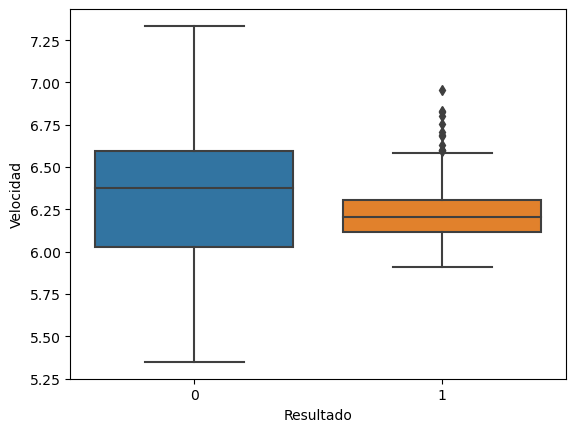

In [5]:
sns.boxplot(pima[["Velocidad","Resultado"]], x="Resultado", y="Velocidad")
plt.savefig("Velocidad.jpg")

## Split dataset in independent variables (X) and target variable (y)

In [69]:
feature_cols = pima.columns
X = pima[feature_cols[:-1]] # Features
y = pima["Resultado"] # Target variable

#display(X)
#display(y)

## Split X and y into training and testing sets

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Fit the logistic regression model with the train dataset

In [71]:
import numpy as np
# import the class
from sklearn.linear_model import LogisticRegression

#Regresion lineal y logística
from sklearn.linear_model import LogisticRegression

#Ajustes previos al entrenamiento o para ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#Hacer Pipelines
from sklearn.pipeline import Pipeline
estimator_lr = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures(include_bias=False)),
        ("logistic_regression", LogisticRegression(max_iter=10000, tol=0.1,solver='liblinear'))])

params_lr = {'polynomial_features__degree': [1, 2, 3, 4, 5],
             "logistic_regression__C": np.logspace(-4,4,10),
             "logistic_regression__penalty": ["l1","l2"]}

kf = StratifiedKFold(shuffle=True, n_splits=3)
grid_lr = GridSearchCV(estimator_lr, params_lr, cv=kf, verbose=1)
%time grid_lr.fit(X_train, y_train);

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred2 = grid_lr.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: user 1.07 s, sys: 11.4 ms, total: 1.08 s
Wall time: 1.1 s


In [72]:
grid_lr.best_params_

{'logistic_regression__C': 2.782559402207126,
 'logistic_regression__penalty': 'l1',
 'polynomial_features__degree': 2}

In [73]:
grid_lr.best_estimator_[2].coef_[0]

array([ 0.44391704,  0.        , -0.26367994, -0.4076293 ,  0.12370684,
        1.35914557, -0.19219562, -0.07450774, -1.473391  ])

In [24]:
logreg.coef_[0]

array([-0.00252623,  0.13384409, -0.02810689, -1.08582398])

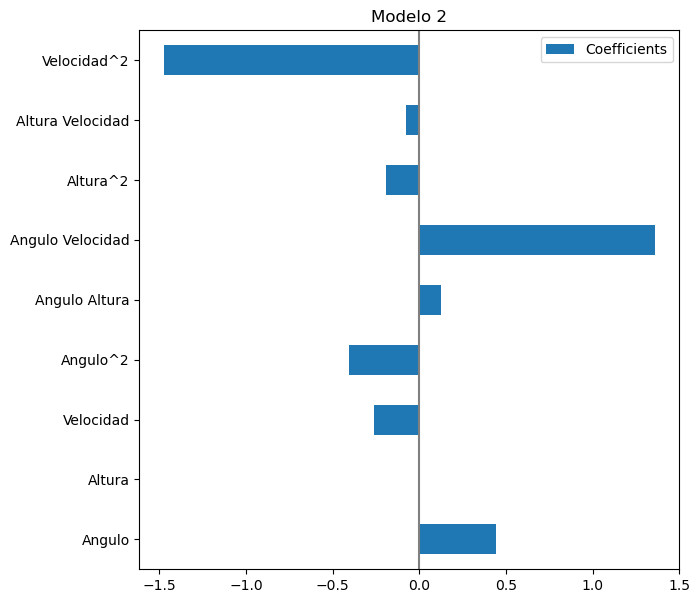

In [74]:
Columnas = grid_lr.best_estimator_[1].get_feature_names_out(X_test.columns)
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    grid_lr.best_estimator_[2].coef_[0], columns=["Coefficients"], index=Columnas
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Modelo 2")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.savefig("Caracteristicas2.jpg")

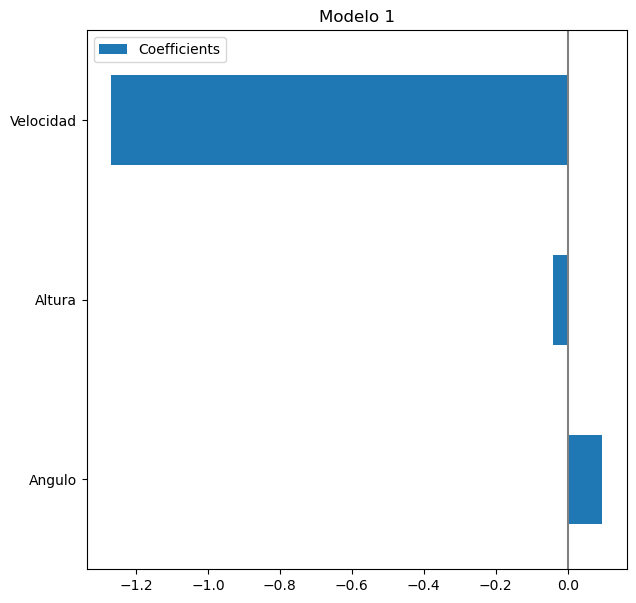

In [75]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    logreg.coef_[0], columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Modelo 1")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.savefig("Caracteristicas.jpg")

## Compute the confusion matrix

In [77]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 2, 18],
       [ 2, 38]])

In [78]:
# import the metrics class
from sklearn import metrics

cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[ 9, 11],
       [ 6, 34]])

## Plot the confusion matrix

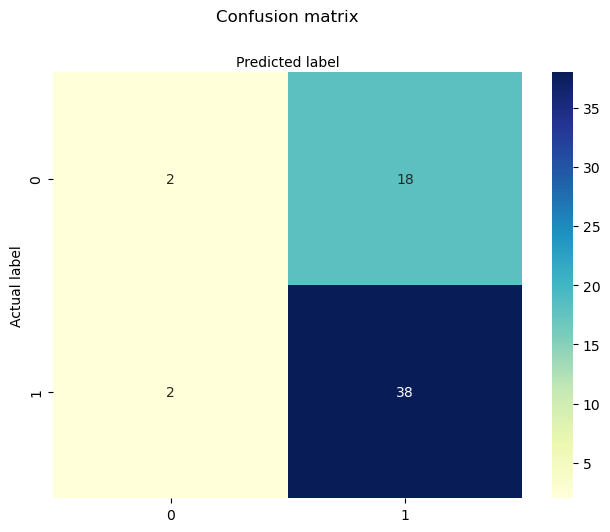

In [79]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig("Confussion.jpg")


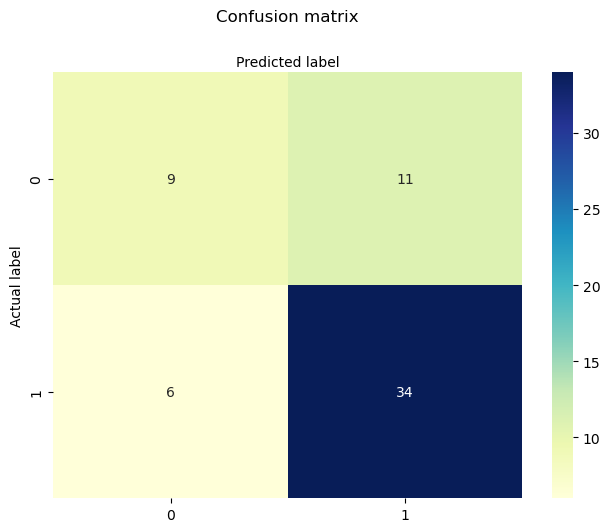

In [80]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig("Confussion2.jpg")

## Compute the metrics

In [81]:
from sklearn.metrics import classification_report
target_names = ['Fallos', 'Cestas']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Fallos       0.50      0.10      0.17        20
      Cestas       0.68      0.95      0.79        40

    accuracy                           0.67        60
   macro avg       0.59      0.53      0.48        60
weighted avg       0.62      0.67      0.58        60



In [82]:
from sklearn.metrics import classification_report
target_names = ['Fallos', 'Cestas']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

      Fallos       0.60      0.45      0.51        20
      Cestas       0.76      0.85      0.80        40

    accuracy                           0.72        60
   macro avg       0.68      0.65      0.66        60
weighted avg       0.70      0.72      0.70        60



## Compute the ROC Curve

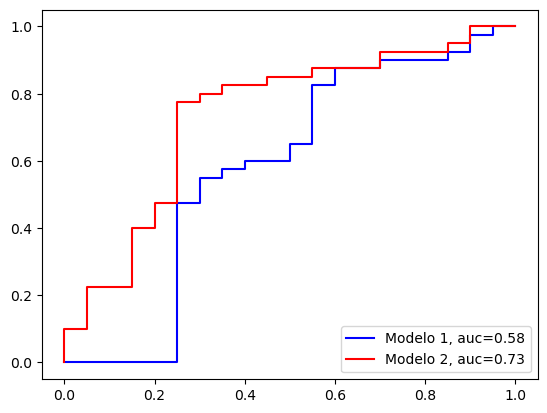

<Figure size 640x480 with 0 Axes>

In [83]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

y_pred_proba2 = grid_lr.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)


plt.plot(fpr,tpr,label="Modelo 1, auc={0:.2f}".format(auc),color="b")
plt.plot(fpr2,tpr2,label="Modelo 2, auc={0:.2f}".format(auc2),color="r")

plt.legend(loc=4)
plt.show()

plt.savefig("ROC.jpg")

## Find the importance of each independent variable

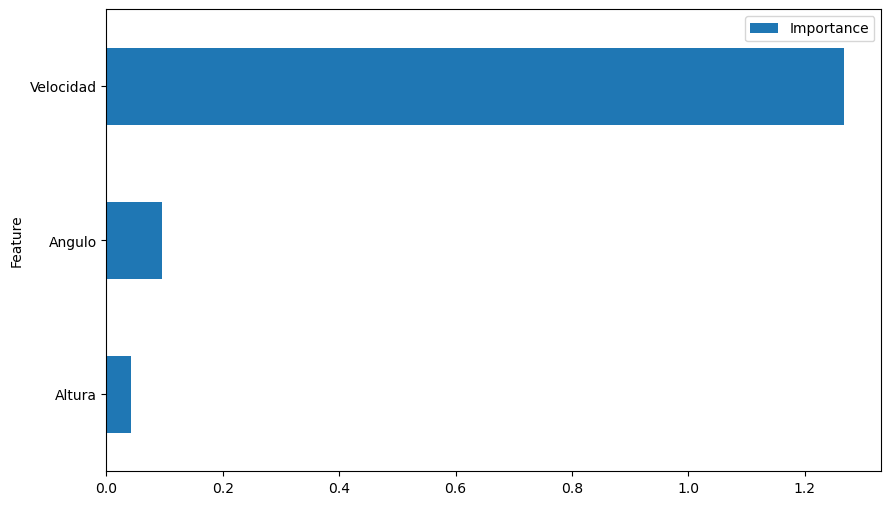

In [84]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

plt.savefig("Feature Importance Plot.jpg")